<a href="https://colab.research.google.com/github/DoniaGabal/Titanic-ML/blob/main/Titanic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-Key features

PassengerId: Unique ID

Survived: 0 = No, 1 = Yes

Pclass: Ticket class (1st, 2nd, 3rd)

Name: Passenger’s full name

Sex: Male or female

Age: Passenger’s age

SibSp/Parch: Number of relatives aboard

Ticket: Ticket number

Fare: Ticket price

Cabin: Cabin number (many missing)

Embarked: Boarding port (C, Q, S)

# 2- Import libiraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#3- Load Data

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# 4- Explore Data

In [ ]:
df_train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [ ]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.shape

(891, 12)

In [ ]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0


In [ ]:
null_values = df_train.isnull().sum()
null_values[null_values>0]

,0
Age,177
Cabin,687
Embarked,2


In [ ]:
df_train.duplicated().sum()

0

In [ ]:
for col in df_train.columns:
    print(f"Value Counts for Column: {col}")
    print(df_train[col].value_counts())
    print("-" * 60)

Value Counts for Column: PassengerId
PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64
------------------------------------------------------------
Value Counts for Column: Survived
Survived
0    549
1    342
Name: count, dtype: int64
------------------------------------------------------------
Value Counts for Column: Pclass
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
------------------------------------------------------------
Value Counts for Column: Name
Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Ke

<Axes: >

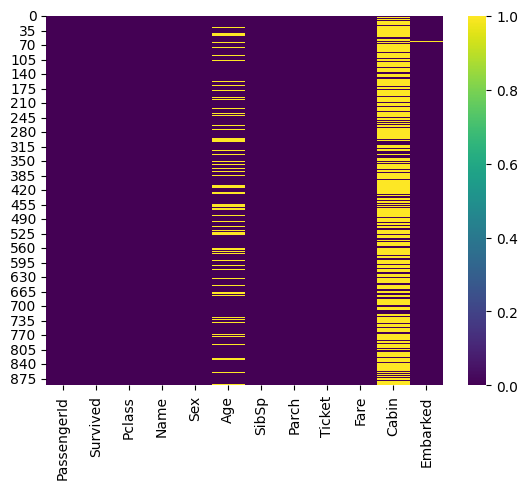

In [ ]:
#heatmap
sns.heatmap(df_train.isnull(),cmap='viridis')

# 5- Clean Data

In [ ]:
#clean Train Data
df_train.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)
df_train.Age=df_train.Age.fillna(df_train.Age.median())
df_train.dropna()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [ ]:
#clean test Data
df_test.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)
df_test.Age=df_train.Age.fillna(df_train.Age.median())
df_test.dropna()

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,22.0,0,0
1,893,3,female,38.0,1,0
2,894,2,male,26.0,0,0
3,895,3,male,35.0,0,0
4,896,3,female,35.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,28.0,0,0
414,1306,1,female,44.0,0,0
415,1307,3,male,28.0,0,0
416,1308,3,male,34.0,0,0


<Axes: >

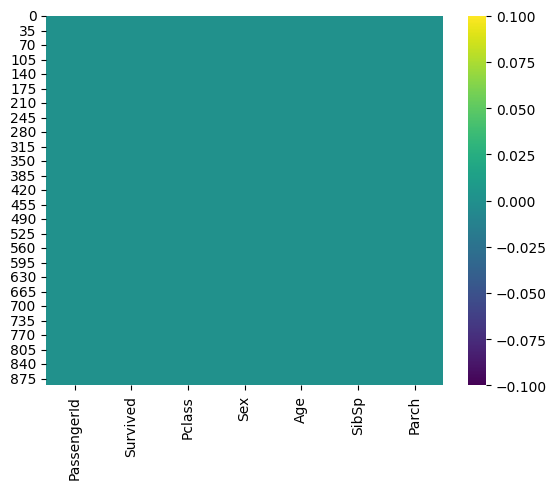

In [ ]:
sns.heatmap(df_train.isnull(),cmap='viridis')

#6- Exploratory Data Analysis (EDA):

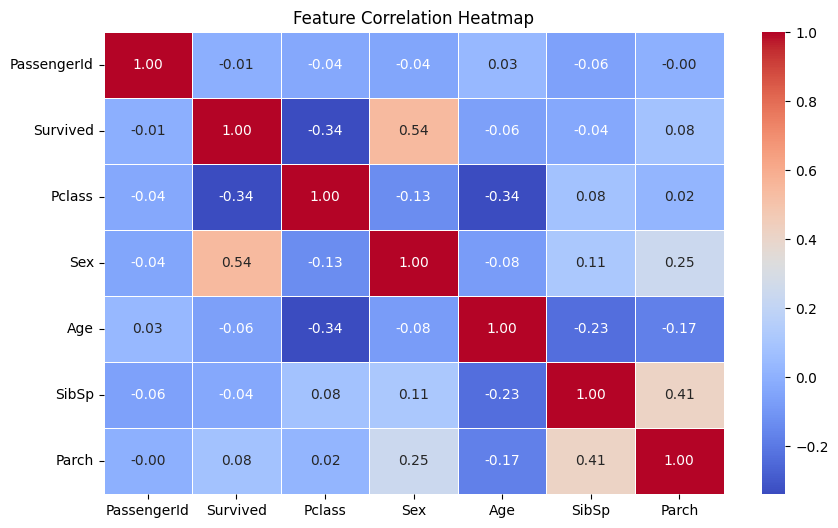

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_train.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


<ipython-input-55-2ae7b702d949>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df_train, palette="coolwarm")


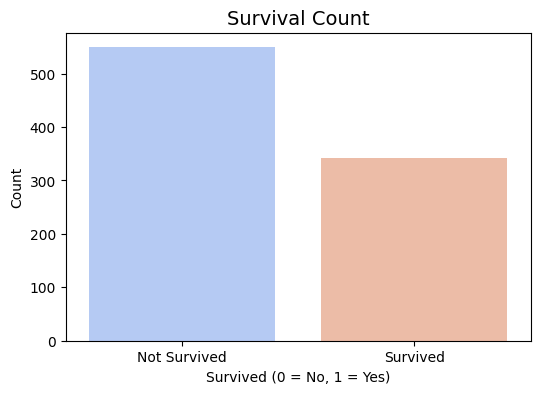

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df_train, palette="coolwarm")
plt.title("Survival Count", fontsize=14)
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.show()


<ipython-input-56-354e4ffadfc4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sex", data=df_train, palette="Set2")


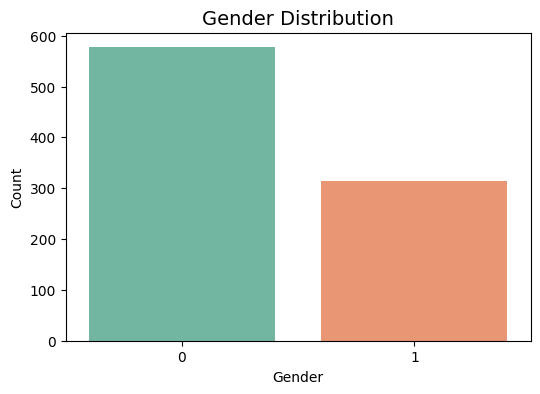

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Sex", data=df_train, palette="Set2")
plt.title("Gender Distribution", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


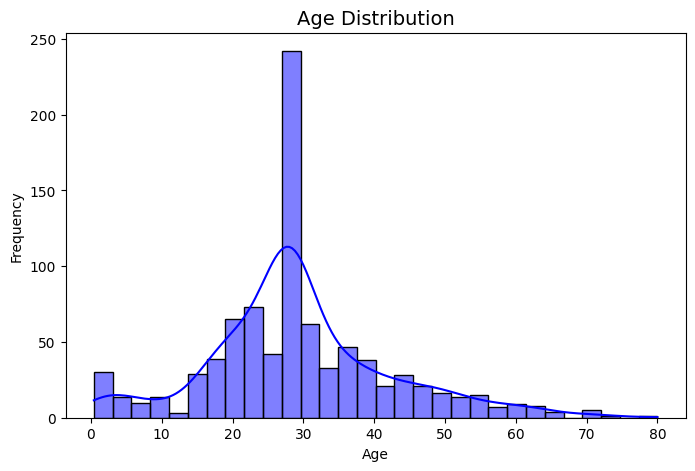

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df_train["Age"], bins=30, kde=True, color="blue")
plt.title("Age Distribution", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


<ipython-input-59-ba2141352462>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Sex", y="Survived", data=df_train, palette="coolwarm")


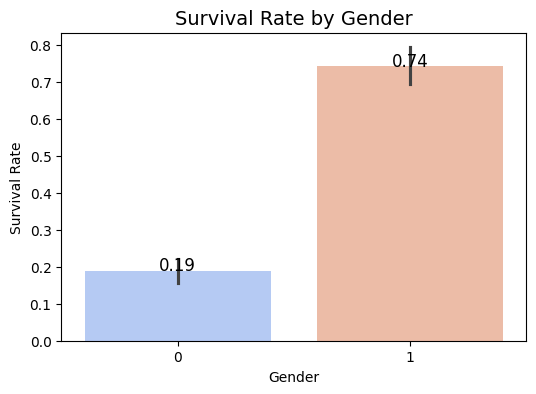

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Sex", y="Survived", data=df_train, palette="coolwarm")
plt.title("Survival Rate by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Survival Rate")

# Add percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12)

plt.show()


<ipython-input-60-96fa89f3ee42>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Pclass", y="Survived", data=df_train, palette="Blues")


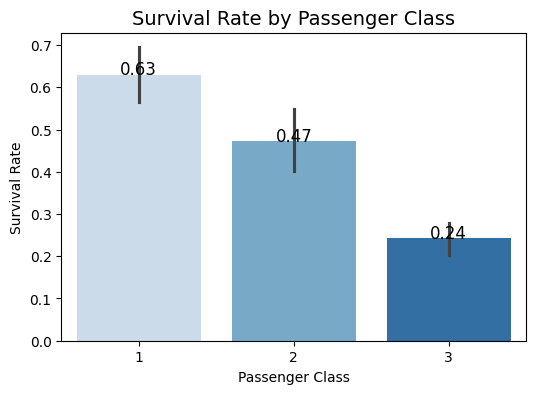

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x="Pclass", y="Survived", data=df_train, palette="Blues")
plt.title("Survival Rate by Passenger Class", fontsize=14)
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")

# Add percentages
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', fontsize=12)

plt.show()


<ipython-input-61-13184daca5e0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[df_train["Survived"] == 1]["Age"], label="Survived", shade=True, color="green")
<ipython-input-61-13184daca5e0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_train[df_train["Survived"] == 0]["Age"], label="Not Survived", shade=True, color="red")


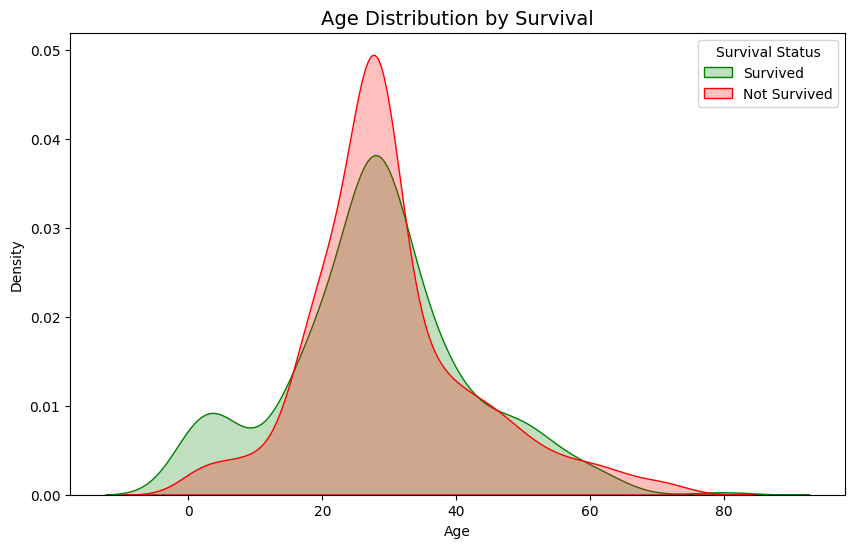

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train["Survived"] == 1]["Age"], label="Survived", shade=True, color="green")
sns.kdeplot(df_train[df_train["Survived"] == 0]["Age"], label="Not Survived", shade=True, color="red")

plt.title("Age Distribution by Survival", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend(title="Survival Status")
plt.show()


# 7-Key Insights from EDA

- Women had a higher survival rate than men.

- 1st class passengers had the highest survival rate, while 3rd class had the lowest.

- Younger passengers had a slightly better survival rate.

- Higher fare passengers were more likely to survive.

# 8- ML Models

In [ ]:
# Define Features (X) and Target (y)
X = df_train.drop("Survived", axis=1)
y = df_train["Survived"]

# Split dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (for SVC & Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 9- logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred_logreg = logreg.predict(X_test_scaled)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


🔹 Logistic Regression Accuracy: 0.7932960893854749
              precision    recall  f1-score   support

           0       0.81      0.86      0.84       110
           1       0.76      0.68      0.72        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



# 10-  Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)

print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

🔹 Decision Tree Accuracy: 0.770949720670391
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       110
           1       0.75      0.61      0.67        69

    accuracy                           0.77       179
   macro avg       0.77      0.74      0.75       179
weighted avg       0.77      0.77      0.77       179



# 11- Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

🔹 Random Forest Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       110
           1       0.82      0.67      0.74        69

    accuracy                           0.82       179
   macro avg       0.82      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



# 12- Support Vector Classifier (SVC)

In [ ]:
svc = SVC(kernel="linear", C=1.0, random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
y_pred_svc = svc.predict(X_test_scaled)

print("🔹 SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

🔹 SVC Accuracy: 0.776536312849162
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       110
           1       0.74      0.65      0.69        69

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.77      0.78      0.77       179



# 13- Model Comparison

<ipython-input-72-1009e4503059>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette="coolwarm")


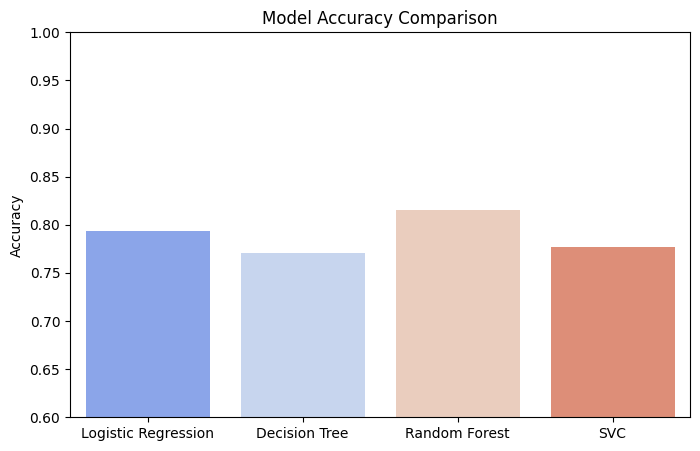

In [ ]:
models = ["Logistic Regression", "Decision Tree", "Random Forest", "SVC"]
accuracy_scores = [
    accuracy_score(y_test, y_pred_logreg),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svc)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy_scores, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.6, 1.0)
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df_test has a 'Sex' column with string values
le = LabelEncoder()
df_test['Sex'] = le.fit_transform(df_test['Sex'])  # Convert 'Sex' to numerical

# Now you can predict
predictions = rf.predict(df_test)

In [ ]:
submission = pd.DataFrame({
    "PassengerId": pd.read_csv("test.csv")["PassengerId"],
    "Survived": predictions
})

submission.to_csv("submission.csv", index=False)